### Notebook demonstrating the use of Timeseriesai for generating predictions
https://github.com/timeseriesAI/timeseriesAI

In [1]:
#uses env timeseriesai

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import sys
sys.path.append('/home/scottcha/src/timeseriesAI')
from tsai.all import *
package_versions()
hardware_details()

tsai       : 0.1.0
fastai2    : 0.0.26
fastcore   : 0.1.30
torch      : 1.6.0
scipy      : 1.5.2
numpy      : 1.19.1
pandas     : 1.1.0
Total RAM  :  47.07 GB
Used RAM   :   2.76 GB
n_cpus     : 16
device     : cuda (GeForce GTX 1080 Ti)


In [6]:
from joblib import Parallel, delayed

In [8]:
temp_path = '/media/scottcha/Data/Temp/'
final_path = '/media/scottcha/E1/Temp/'

In [7]:
def calculate_feature_mean(feature):
    print('On feature: ' + str(feature))
    return np.nanmean(X[0:100000,feature,:])

In [69]:
def calculate_feature_std(feature):
    print('On feature: ' + str(feature))
    return np.nanstd(X[0:100000,feature,:])

In [8]:
#if we don't have cached versions of these we need to calcualte this for the feature
#standardization, this takes awhile and requires a lot of memory so I only do it on a subset
#of the data
feature_means = Parallel(n_jobs=4)(map(delayed(calculate_feature_mean), range(0,1131)))

In [70]:
feature_std = Parallel(n_jobs=4)(map(delayed(calculate_feature_std), range(0,1131)))

In [71]:
feature_std

[3.168977e-05,
 3.8151404e-05,
 3.9729734e-05,
 1.848747e-05,
 2.0589976e-05,
 2.0003798e-05,
 2.2254802e-05,
 2.2795373e-05,
 2.357784e-05,
 2.7462887e-05,
 2.9853307e-05,
 2.9238343e-05,
 4.10277e-05,
 4.520019e-05,
 4.424067e-05,
 1.590704e-05,
 1.6410742e-05,
 1.6527683e-05,
 5.223855e-05,
 6.7742454e-05,
 5.0993815e-05,
 5.648496e-05,
 8.832503e-05,
 4.923824e-05,
 1.2719349e-05,
 1.3444304e-05,
 1.2924686e-05,
 5.5692584e-05,
 9.9880286e-05,
 4.6275003e-05,
 5.1768722e-05,
 9.901346e-05,
 4.4477423e-05,
 4.6820827e-05,
 8.988064e-05,
 4.3657696e-05,
 4.265958e-05,
 8.0069825e-05,
 4.351397e-05,
 1.2364369e-05,
 1.3772883e-05,
 1.2931616e-05,
 4.0979805e-05,
 7.328978e-05,
 4.575591e-05,
 5.2339507e-05,
 7.645523e-05,
 6.156895e-05,
 7.6322474e-05,
 8.931511e-05,
 8.6183405e-05,
 8.0267004e-05,
 9.168609e-05,
 9.090032e-05,
 1.4859117e-05,
 1.756806e-05,
 1.5936188e-05,
 7.007868e-05,
 8.494127e-05,
 8.008125e-05,
 7.0626615e-05,
 8.28319e-05,
 8.473003e-05,
 7.02812e-05,
 7.75452

In [9]:
feature_means

[9.226132e-05,
 0.00012310808,
 6.2855324e-05,
 0.00010292571,
 0.00011669127,
 8.9409645e-05,
 9.978263e-05,
 0.00010817268,
 9.163938e-05,
 0.0001071972,
 0.00012906143,
 8.608308e-05,
 0.000107464475,
 0.00014390903,
 7.367478e-05,
 9.599921e-05,
 0.000102464204,
 8.9653535e-05,
 0.0001043552,
 0.00016358084,
 5.418455e-05,
 0.000102424856,
 0.00017798727,
 4.1907373e-05,
 9.481174e-05,
 0.000100515215,
 8.913979e-05,
 0.00010088152,
 0.00018340633,
 3.6303947e-05,
 9.9461686e-05,
 0.0001808979,
 3.513326e-05,
 9.7852084e-05,
 0.00017397462,
 3.5218953e-05,
 9.541624e-05,
 0.00016646128,
 3.4435066e-05,
 9.609249e-05,
 0.000103591236,
 8.870137e-05,
 9.230369e-05,
 0.00016092203,
 3.170257e-05,
 8.99292e-05,
 0.00016235496,
 2.3406006e-05,
 8.769859e-05,
 0.0001620547,
 1.8008956e-05,
 8.684541e-05,
 0.0001576474,
 2.010628e-05,
 9.890567e-05,
 0.000109847075,
 8.855883e-05,
 8.94892e-05,
 0.00015132829,
 3.0532592e-05,
 8.9249304e-05,
 0.00014406134,
 3.5726258e-05,
 8.67948e-05,
 

In [22]:
#cache the values
np.save(final_path + '/feature_means.npy', np.asarray(feature_means))

In [72]:
np.save(final_path + '/feature_std.npy', np.asarray(feature_std))

In [9]:
#load the values
feature_means = np.load(final_path + '/feature_means.npy')

In [10]:
feature_means

array([9.2261318e-05, 1.2310808e-04, 6.2855324e-05, ..., 9.4567694e-02,
       9.4567694e-02, 9.4567694e-02], dtype=float32)

In [11]:
feature_std = np.load(final_path + '/feature_std.npy')

In [17]:
#load the X data from numpy as memmapped file
X = np.load(temp_path + 'data/X_all.npy', mmap_mode='r')

In [10]:
#read in the corresponding label files and concat them
#you need to know a bit how these files were created to provide the 
#right values here
num_y_train_per_batch = 100
num_y_batches = 1
num_y_test_batches = 1
y_df = None
for i in range(0, num_y_batches):
    for j in range(0, num_y_train_per_batch):
        df = pd.read_parquet(temp_path + 'data/y_train_batch_' + str(i) + '_' + str(j) + '.0.parquet')  
        y_df = pd.concat([y_df, df])

num_y_train_per_batch = 20 #100
for i in range(0, num_y_test_batches):
    for j in range(0, num_y_train_per_batch):
        df = pd.read_parquet(temp_path + 'data/y_test_batch_' + str(i) + '_' + str(j) + '.0.parquet')  
        y_df = pd.concat([y_df, df])

In [11]:
#cache the labels 
pickle.dump( y_df, open( final_path + 'y_df.p', 'wb' ) )

In [18]:
y_df = pickle.load( open(  final_path + 'y_df.p', 'rb' ) )

In [19]:
y_df.shape

(300000, 302)

In [20]:
X.shape

(300000, 1131, 180)

In [21]:
y_df[200000:]['Day1DangerAboveTreeline'].value_counts()

Considerable    25000
High            25000
Moderate        25000
Low             25000
Name: Day1DangerAboveTreeline, dtype: int64

In [23]:
y_df[:200000]['Day1DangerAboveTreeline'].value_counts()

Moderate        50000
Considerable    50000
High            50000
Low             50000
Name: Day1DangerAboveTreeline, dtype: int64

In [24]:
y_df[:200000]['parsed_date'].value_counts().sort_index(ascending=False)

2018-04-29    100
2018-04-28    400
2018-04-27    159
2018-04-22     79
2018-04-21    177
             ... 
2015-11-15     99
2015-11-14     65
2015-11-13     90
2015-11-12      2
2015-11-11      9
Name: parsed_date, Length: 476, dtype: int64

In [25]:
y_df[200000:]['parsed_date'].value_counts().sort_index(ascending=False)

2019-04-14     112
2019-04-13     250
2019-04-12     172
2019-04-11      31
2019-04-08     257
              ... 
2018-11-19    1964
2018-11-18    1044
2018-11-17    1869
2018-11-16    1763
2018-11-15    1353
Name: parsed_date, Length: 137, dtype: int64

In [26]:
#convert the labels to encoded values
y_df['Day1AboveCat'] = y_df['Day1DangerAboveTreeline'].astype('category')
y = y_df['Day1AboveCat'].cat.codes.values

In [27]:
y_df['Day1AboveCat']

0          Moderate
1      Considerable
2              High
3              High
4          Moderate
           ...     
495    Considerable
496    Considerable
497    Considerable
498    Considerable
499        Moderate
Name: Day1AboveCat, Length: 300000, dtype: category
Categories (4, object): ['Considerable', 'High', 'Low', 'Moderate']

In [28]:
y_df['Day1AboveCat'].cat.codes.head()

0    3
1    0
2    1
3    1
4    3
dtype: int8

In [29]:
y.shape

(300000,)

In [30]:
X_size=200000

In [53]:
#index file which indicates which rows in X are train or test
#be carful these don't overlap
train_test_split = 200000
#currently using a smaller subset to make development faster
splits_2 = (L([i for i in range(0,50000)]), L([i for i in range(train_test_split,train_test_split+20000)]))

In [54]:
splits_2

((#50000) [0,1,2,3,4,5,6,7,8,9...],
 (#20000) [200000,200001,200002,200003,200004,200005,200006,200007,200008,200009...])

In [33]:
#load and check the means and std deviations
feature_means = (np.nan_to_num(feature_means))

In [34]:
np.isnan(feature_means).any()

False

In [35]:
feature_std = (np.nan_to_num(feature_std, nan=1.0))

In [36]:
np.isnan(feature_std).any()

False

In [37]:
#method to standardize each batch while also replacing any nans with the mean value before standarization
class TSStandardizeNanMeanReplaceNan(Transform):
    "Standardize/destd batch of `NumpyTensor` or `TSTensor`"
    parameters, order = L('mean', 'std'), 99
    def __init__(self, mean=None, std=None, by_sample=False, by_var=False, verbose=False):
        self.mean = tensor(mean) if mean is not None else None
        self.std = tensor(std) if std is not None else None
        self.by_sample, self.by_var = by_sample, by_var
        if by_sample and by_var: self.axes = (2)
        elif by_sample: self.axes = (1, 2)
        elif by_var: self.axes = (0, 2)
        else: self.axes = ()
        self.verbose = verbose

    @classmethod
    def from_stats(cls, mean, std): return cls(mean, std)

    def setups(self, dl: DataLoader):
        if self.mean is None or self.std is None:
            pv(f'{self.__class__.__name__} setup mean={self.mean}, std={self.std}, by_sample={self.by_sample}, by_var={self.by_var}', self.verbose)
            x, *_ = dl.one_batch()
            x = torch.where(torch.isnan(x), torch.zeros_like(x), x)
            self.mean, self.std = x.mean(self.axes, keepdim=self.axes!=()), x.std(self.axes, keepdim=self.axes!=()) + 1e-7
            pv(f'mean: {self.mean}  std: {self.std}\n', self.verbose)

    def encodes(self, x:(NumpyTensor, TSTensor)):
        fill_values = torch.zeros_like(x)
        std_values = torch.zeros_like(x)       
        for i in range(0,x.shape[1]):
            fill_values[:,i,:] = torch.full_like(x[:,i,:], feature_means[i])
            std_values[:,i,:] = torch.full_like(x[:,i,:], feature_std[i])
        
        x = torch.where(torch.isnan(x), fill_values, x)
       
        if self.by_sample:        
            self.mean, self.std = x.mean(self.axes, keepdim=self.axes!=()), x.std(self.axes, keepdim=self.axes!=()) + 1e-7
            
        t = (x - fill_values) / std_values
        del fill_values, std_values
        return torch.where(torch.isnan(t), torch.zeros_like(t), t)

In [38]:
X.shape

(300000, 1131, 180)

In [55]:
#create the dataset
tfms = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits_2, inplace=True)

<AxesSubplot:title={'center':'2'}>

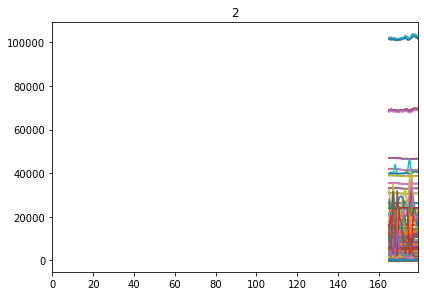

In [56]:
#check on set
show_at(dsets.valid, 3)

In [57]:
#create the dataloader
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[128], batch_tfms=[TSStandardizeNanMeanReplaceNan()], num_workers=0)

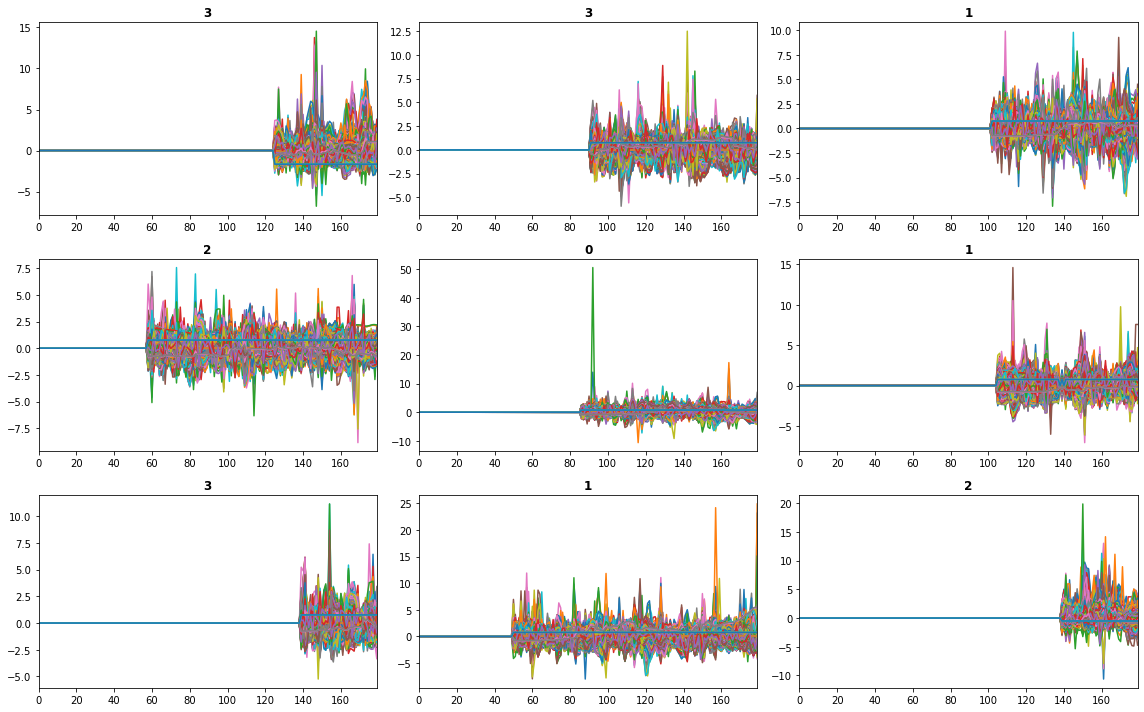

In [58]:
dls.show_batch()

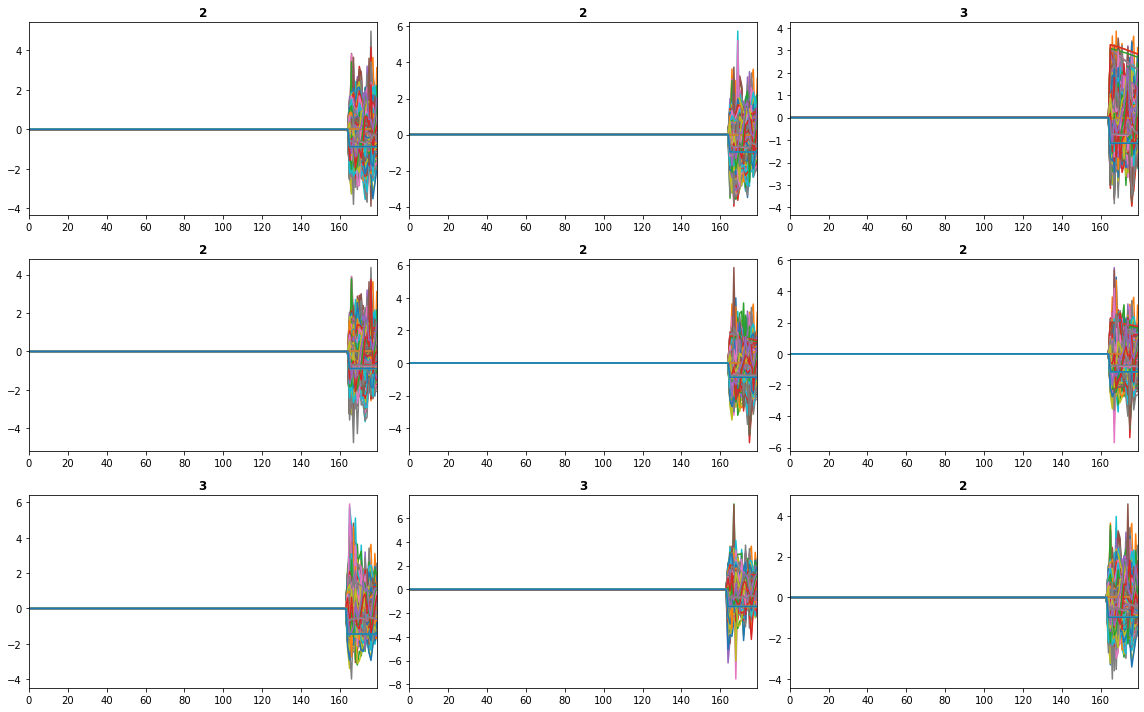

In [59]:
dls.valid.show_batch()

In [60]:
dls.c

4

In [61]:
dls.vars

1131

In [70]:
model = InceptionTime(dls.vars, dls.c)
matcor = MatthewsCorrCoef()

learn = Learner(dls, model, metrics=[matcor, accuracy], callback_fns=[partial(EarlyStoppingCallback, monitor='accuracy', min_delta=0.01, patience=5)])
learn.save('stage0')

In [63]:
learn.model

InceptionTime(
  (block): InceptionBlock(
    (inc_mods): ModuleList(
      (0): Inception(
        (conv_layers): ModuleList(
          (0): Conv1d(1131, 120, kernel_size=(39,), stride=(1,), padding=(19,))
          (1): Conv1d(1131, 120, kernel_size=(19,), stride=(1,), padding=(9,))
          (2): Conv1d(1131, 120, kernel_size=(9,), stride=(1,), padding=(4,))
        )
        (maxpool): MaxPool1d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
        (conv): Conv1d(1131, 120, kernel_size=(1,), stride=(1,))
        (bn): BatchNorm1d(480, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): ReLU()
      )
      (1): Inception(
        (bottleneck): Conv1d(480, 32, kernel_size=(1,), stride=(1,))
        (conv_layers): ModuleList(
          (0): Conv1d(32, 120, kernel_size=(39,), stride=(1,), padding=(19,))
          (1): Conv1d(32, 120, kernel_size=(19,), stride=(1,), padding=(9,))
          (2): Conv1d(32, 120, kernel_size=(9,), stride=(1,),

SuggestedLRs(lr_min=0.014454397559165954, lr_steep=0.0003311311302240938)

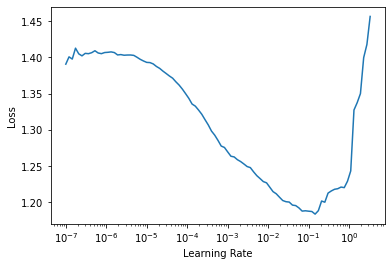

In [67]:
learn.load('stage0')
learn.lr_find()

In [71]:
learn.fit_one_cycle(3, lr_max=1e-2)
learn.save('stage1')

epoch,train_loss,valid_loss,matthews_corrcoef,accuracy,time
0,0.338287,2.030967,0.467463,0.587650,16:07
1,0.160301,3.014429,0.300383,0.445350,18:49
2,0.076994,4.128393,0.235842,0.396600,19:13


### Results
1. looking at the metrics above it seems to be overfitting after epoch 1
2. Looking at the confusion matrix we can see that its ok at distinquishing between 0/1 & 2/3 

Possibilities:
1. the data formatting phase does interpolation, this might be causing the overfitting on training--too much similar data
2. There may be features which are causing the overfitting


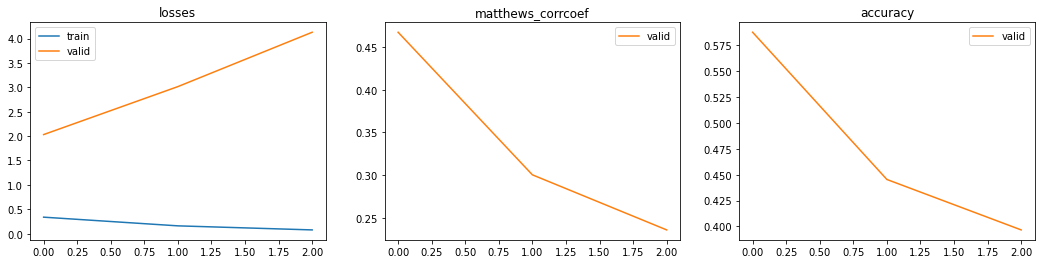

In [72]:
learn.recorder.plot_metrics()

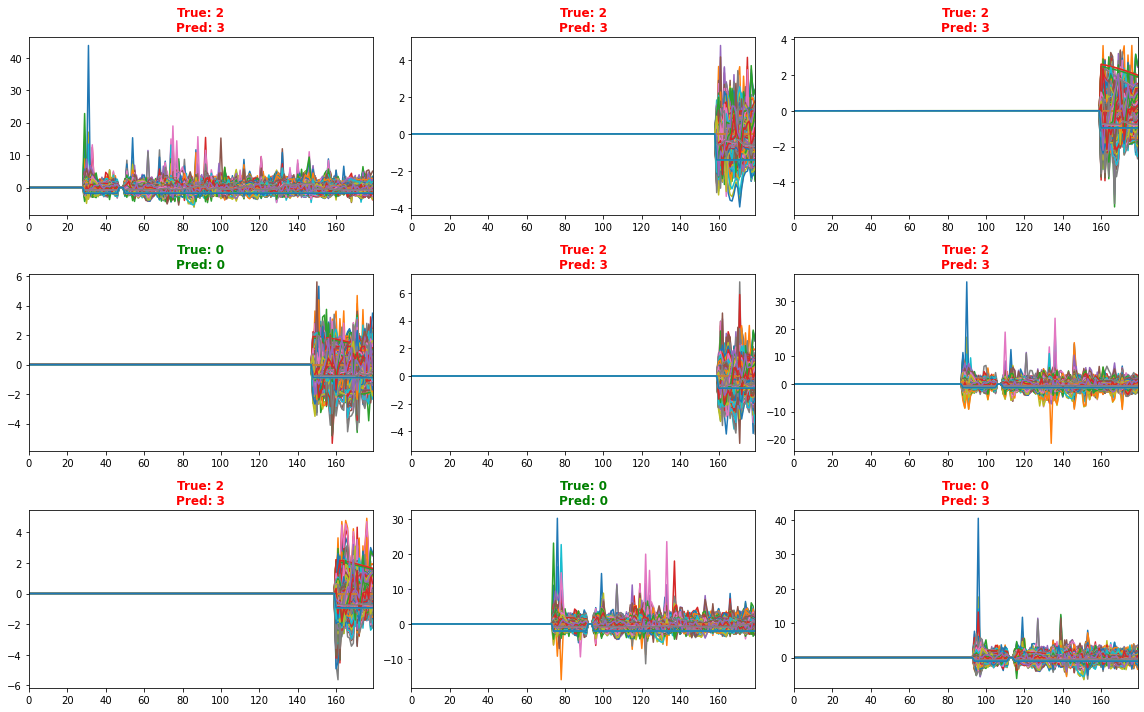

In [73]:
learn.show_results()

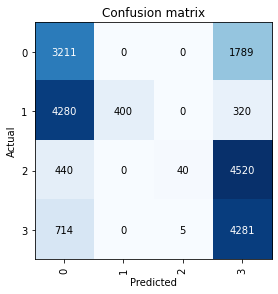

In [74]:
#confustion matrix, not very good, more work to do . . .
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()